In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

import wrangle
import env
import explore

1. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

2. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

3. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

4. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

5. Come up with some initial hypotheses based on your goal of predicting property value.

6. Visualize all combinations of variables in some way.

7. Run the appropriate statistical tests where needed.

8. What independent variables are correlated with the dependent variable, home value?

9. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

10. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

11. Explore your dataset with any other visualizations you think will be helpful.

In [110]:
train, validate, test = wrangle.wrangle_zillow(wrangle.clean_zillow(wrangle.wrangle_get_zillow()))

this file exists, reading from csv file


In [111]:
train.shape, validate.shape, test.shape

((1284141, 7), (428047, 7), (428047, 7))

> 1. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [112]:
train_1000 = train.sample(1000)

In [113]:
train_1000

,bedroom,bathroom,square_ft,property_value,yr_built,tax,county
341943,3.0,2.0,1086.0,52552.0,1958,911.80,Orange
2067354,3.0,2.0,1728.0,388568.0,1961,4551.66,Ventura
812634,4.0,3.0,2392.0,280649.0,1968,3540.29,LA
129552,3.0,2.0,1328.0,117026.0,1964,1280.04,Ventura
396920,3.0,2.0,1711.0,89449.0,1953,1338.80,Orange
...,...,...,...,...,...,...,...
1164672,4.0,2.0,2154.0,282588.0,1964,3552.38,LA
1455029,3.0,2.0,1479.0,368708.0,1954,4518.24,LA
785032,4.0,2.0,2145.0,662433.0,1965,7608.20,Orange
526708,2.0,1.5,1234.0,72525.0,1964,752.62,Orange


this file exists, reading from csv file


,bedroom,bathroom,square_ft,property_value,yr_built,tax,county
1591337,3.0,4.5,4349.0,1016047.0,1994,11193.88,Orange
104224,2.0,1.0,931.0,341000.0,1939,5103.96,LA
1740729,4.0,2.0,1222.0,169752.0,1955,2299.31,LA
1177799,4.0,3.0,1931.0,145997.0,1937,1645.75,LA
1648440,3.0,2.0,1333.0,300106.0,1954,3727.56,LA
...,...,...,...,...,...,...,...
1018445,4.0,2.0,1575.0,112933.0,1960,2002.78,LA
1528837,5.0,4.0,2577.0,497837.0,2004,9000.91,LA
1089475,4.0,2.0,1352.0,359831.0,1955,4418.91,LA
1751381,2.0,1.0,830.0,113772.0,1958,1617.19,LA


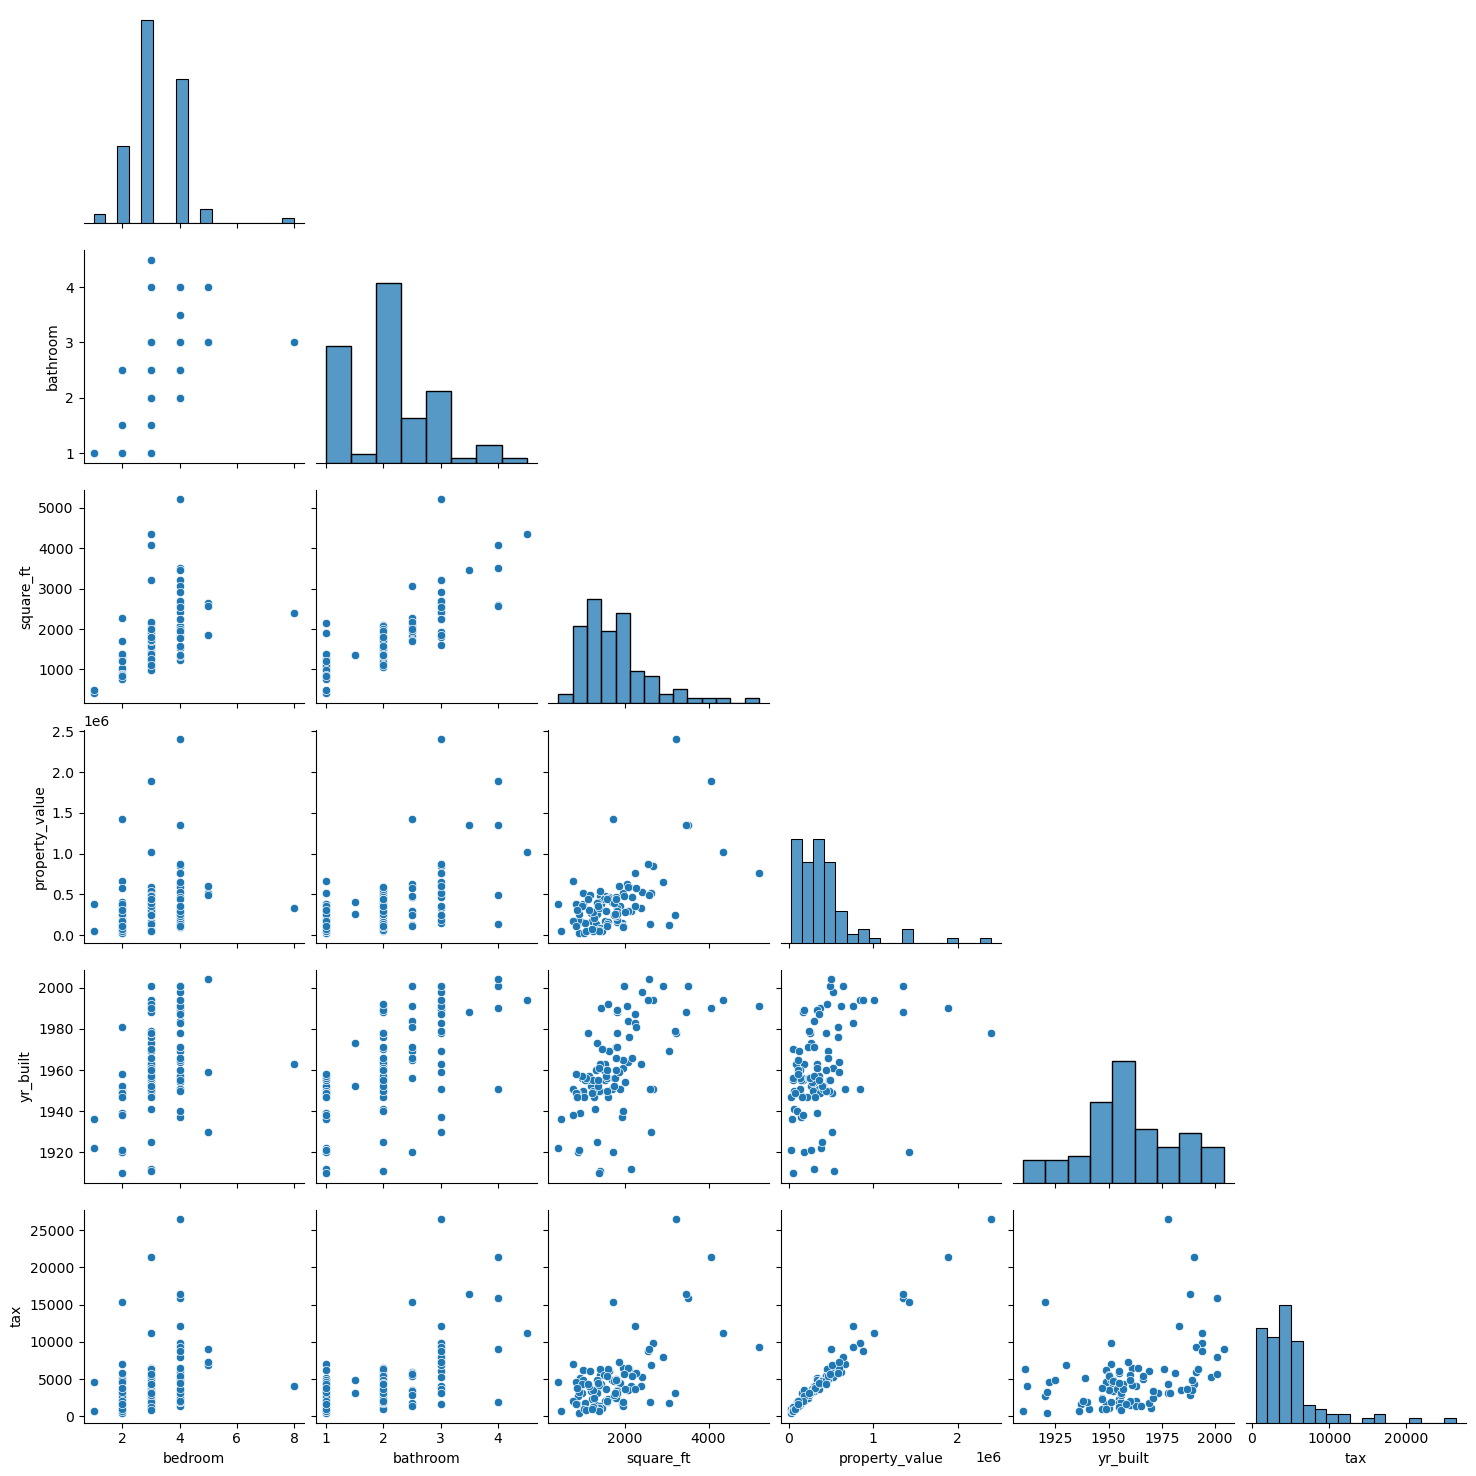

In [6]:
# Used a function to plot random sample of train dataframe
explore.plot_variable_pairs()

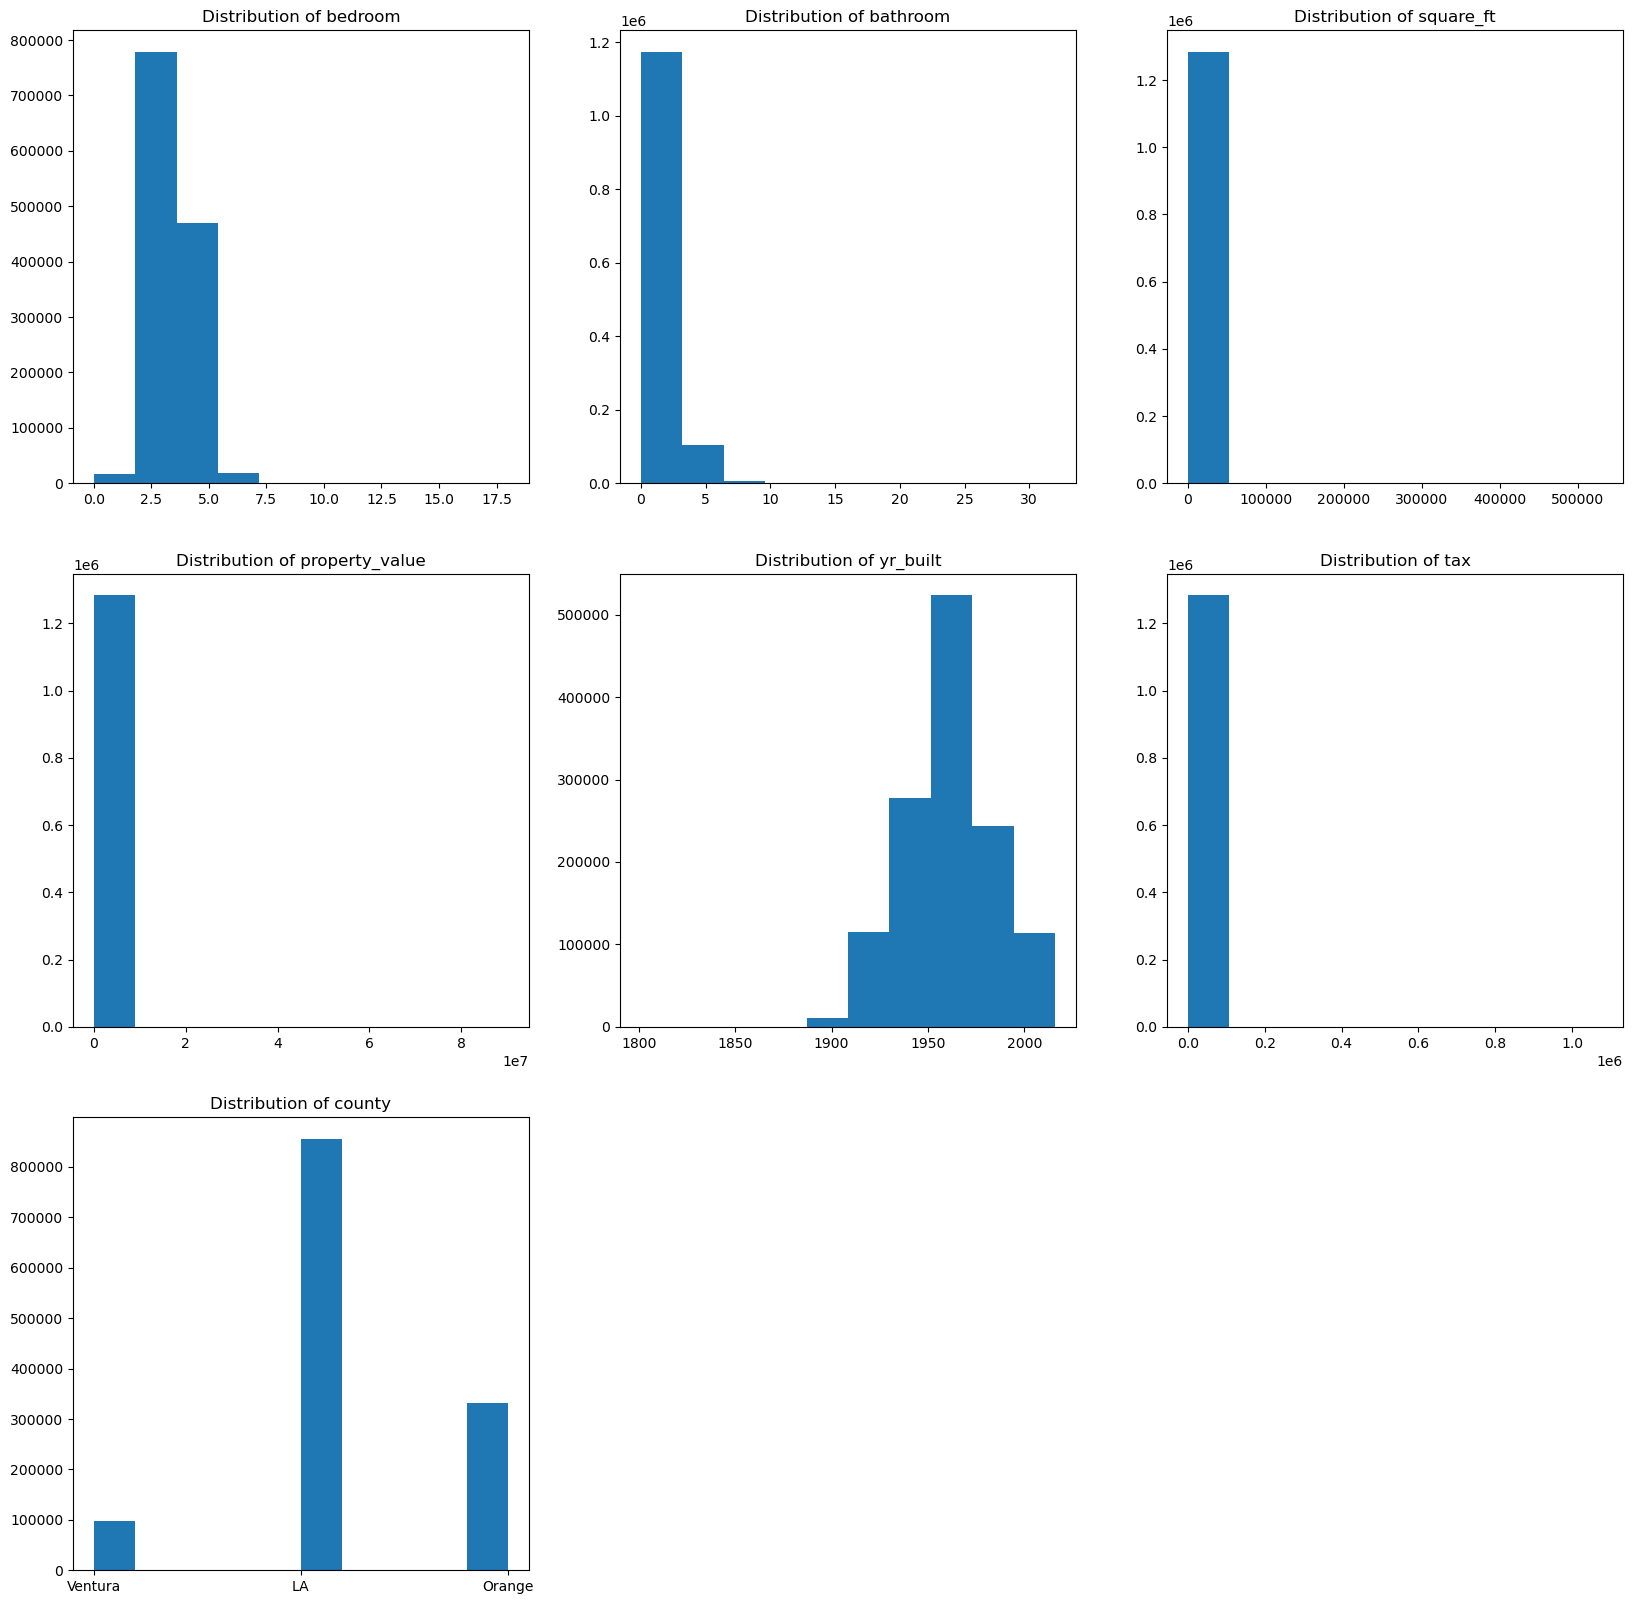

In [7]:
plt.figure(figsize=(20,20))
for i, col in enumerate(train.columns):
    subplot_num = i+1
    plt.subplot(3,3,subplot_num)
    plt.title(f'Distribution of {col}')
    train[col].hist(bins=10)
    plt.grid(False)
plt.show();

In [8]:
def disc_cols(df):
    cat_cols= df.select_dtypes(include=['object']).columns.tolist()
    return cat_cols

def cont_cols(df):
    num_cols= df.select_dtypes(exclude=['object']).columns.tolist()
    return num_cols

In [9]:
cont_cols(train)

['bedroom', 'bathroom', 'square_ft', 'property_value', 'yr_built', 'tax']

In [10]:
disc_cols(train)

['county']

In [11]:
train_1000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 517223 to 2139799
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedroom         1000 non-null   float64
 1   bathroom        1000 non-null   float64
 2   square_ft       1000 non-null   float64
 3   property_value  1000 non-null   float64
 4   yr_built        1000 non-null   int64  
 5   tax             1000 non-null   float64
 6   county          1000 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 62.5+ KB


In [54]:
def plot_categorical_and_continuous_vars(df, cat_vars, cont_vars):
    """
    Plots 3 different plots for visualizing a categorical variable and a continuous variable.

    Parameters:
    df (pandas.DataFrame): The input dataframe.
    cat_vars (list): The list of column names that hold the categorical features.
    cont_vars (list): The list of column names that hold the continuous features.
    """

    for cat_var in cat_vars:
        for cont_var in cont_vars:
            # Plot a boxplot of the continuous variable for each category
            plt.figure(figsize=(15, 5))
            sns.boxplot(x=cat_var, y=cont_var, data=df, palette="pastel")
            plt.title(f"{cont_var} by {cat_var}")
            sns.set(style="ticks", context="talk")
            # plt.style.use("ggplot")
            plt.show()

            # Plot a histogram of the continuous variable for each category

            plt.figure(figsize=(15, 10))
            for cat in df[cat_var].unique():
                sns.histplot(
                    df[df[cat_var] == cat][cont_var],
                    label=cat,
                    alpha=0.5,
                    kde=True,
                    palette="pastel",
                )
            plt.title(f"{cont_var} by {cat_var}")
            plt.legend()
            sns.set(style="ticks", context="talk")
            # plt.style.use("ggplot")
            plt.show()

            # Plot a violinplot of the continuous variable for each category
            plt.figure(figsize=(15, 5))
            sns.violinplot(x=cat_var, y=cont_var, data=df, palette="pastel")
            plt.title(f"{cont_var} by {cat_var}")
            sns.set(style="ticks", context="talk")
            # plt.style.use("ggplot")
            plt.show()

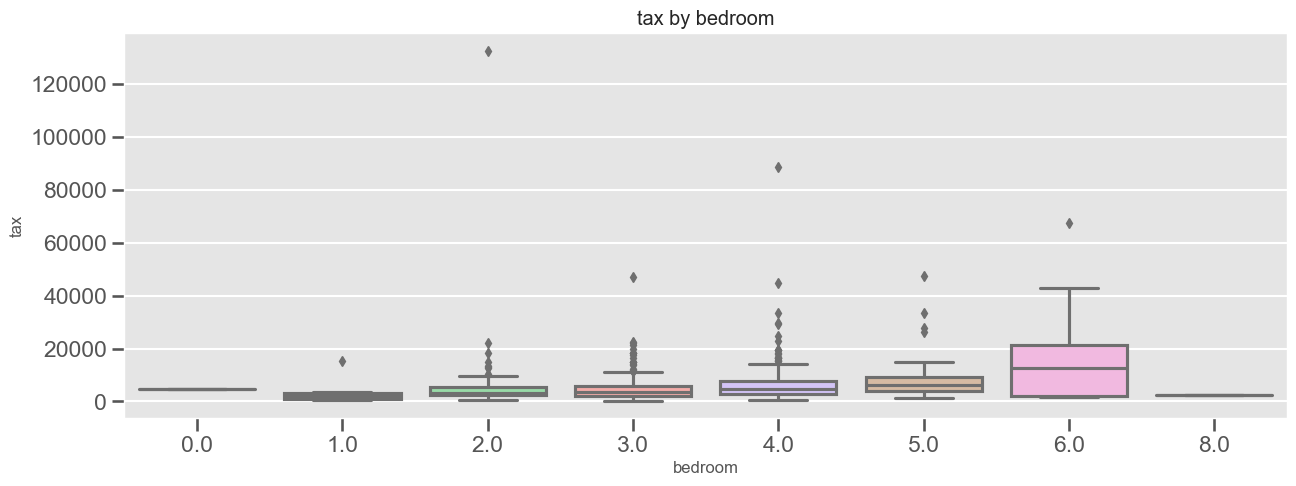

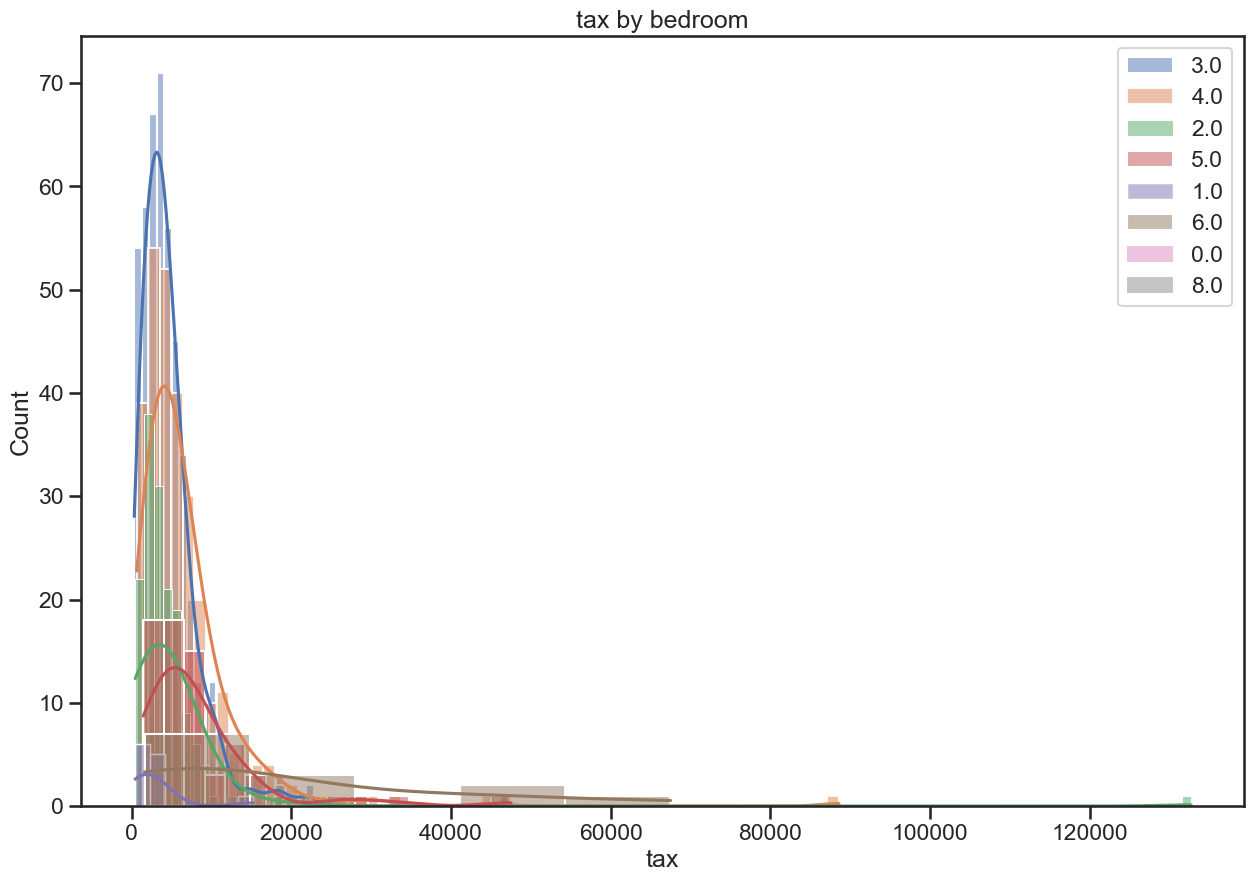

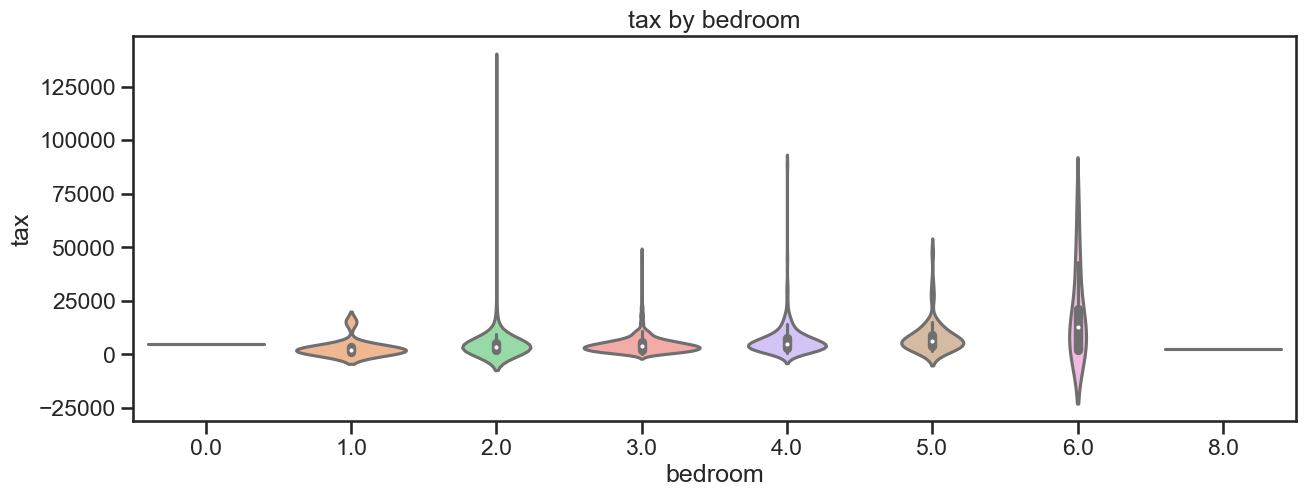

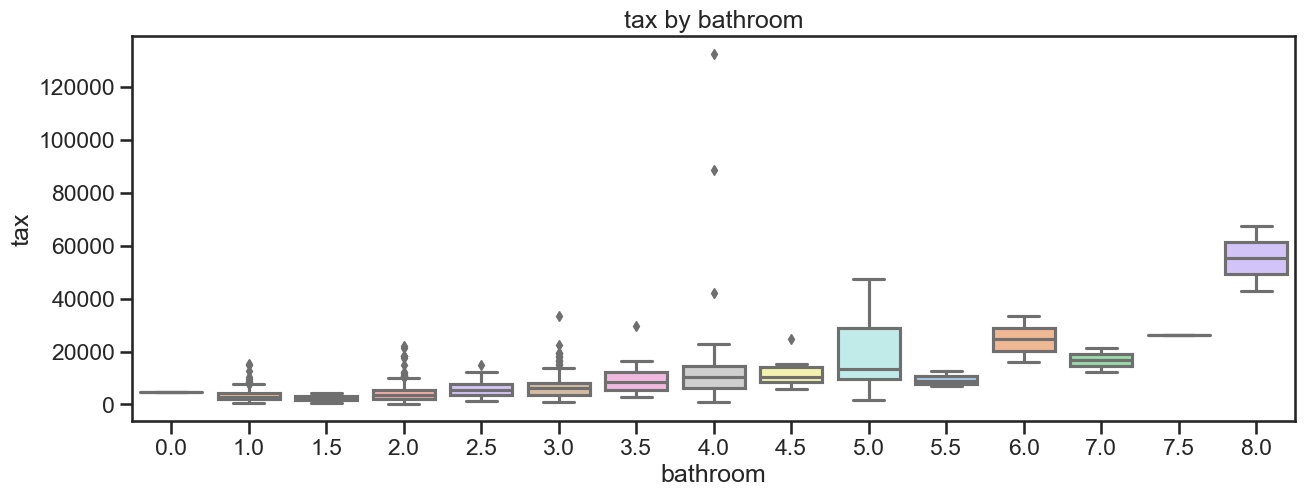

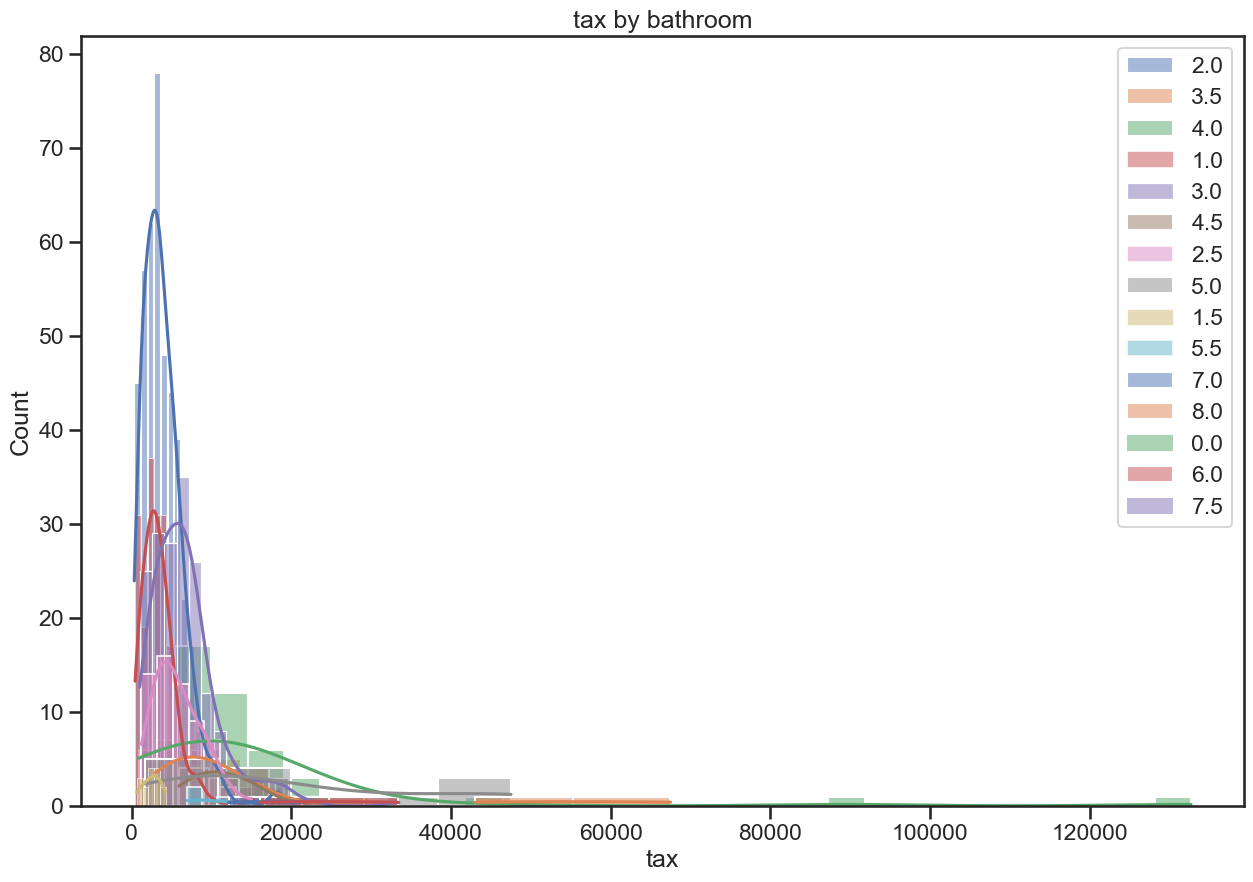

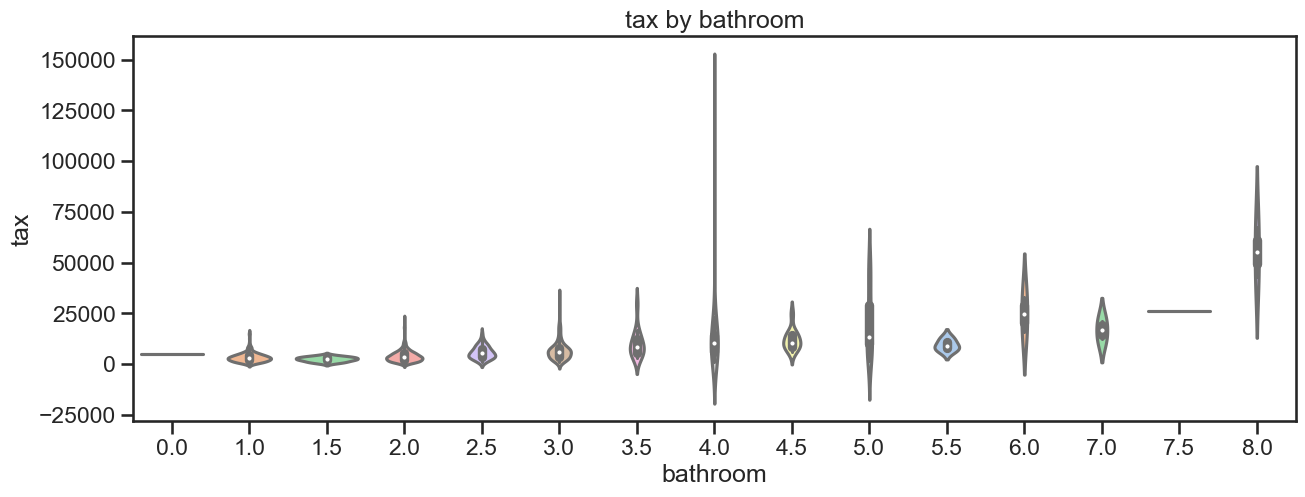

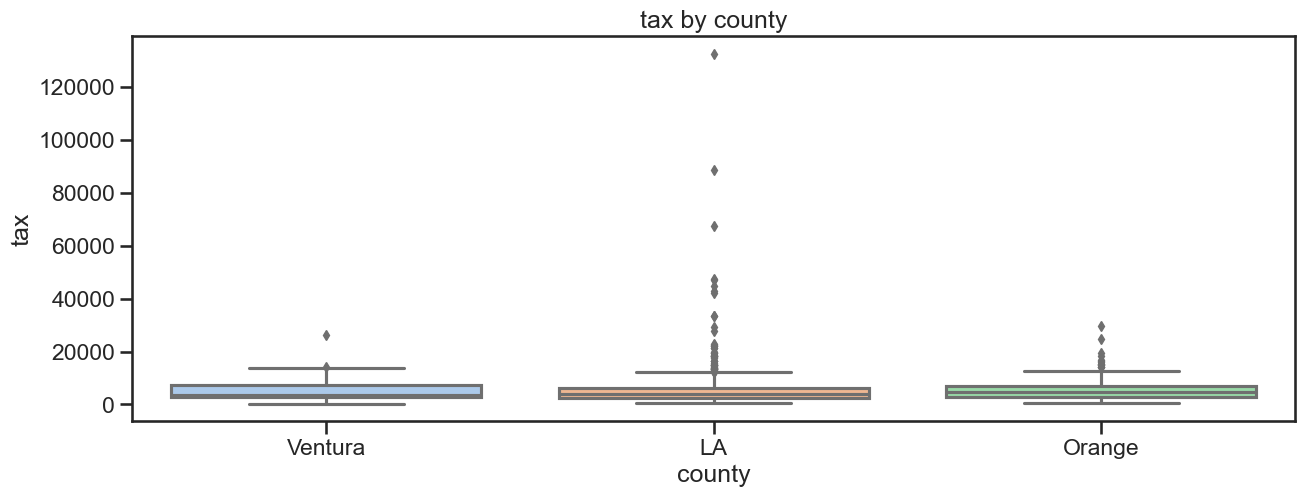

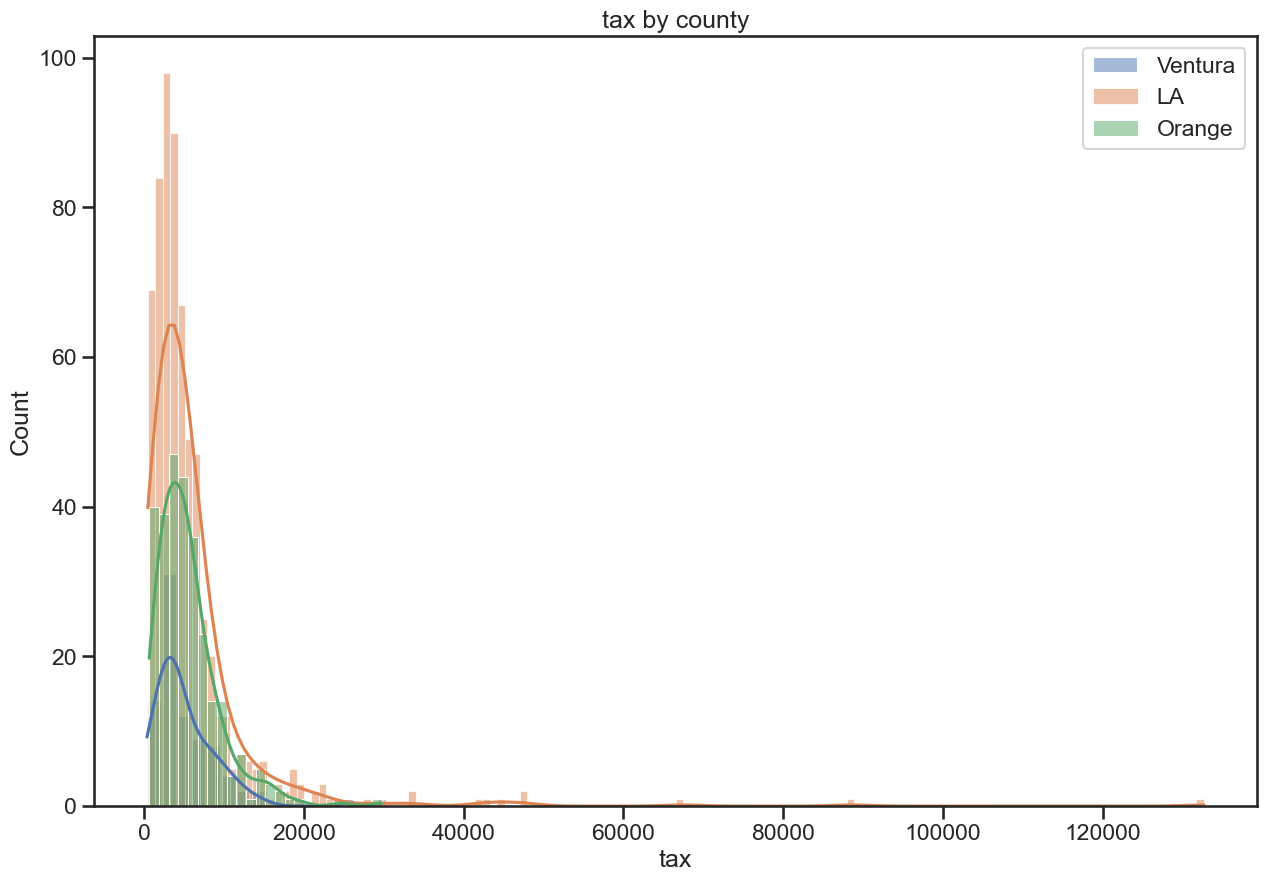

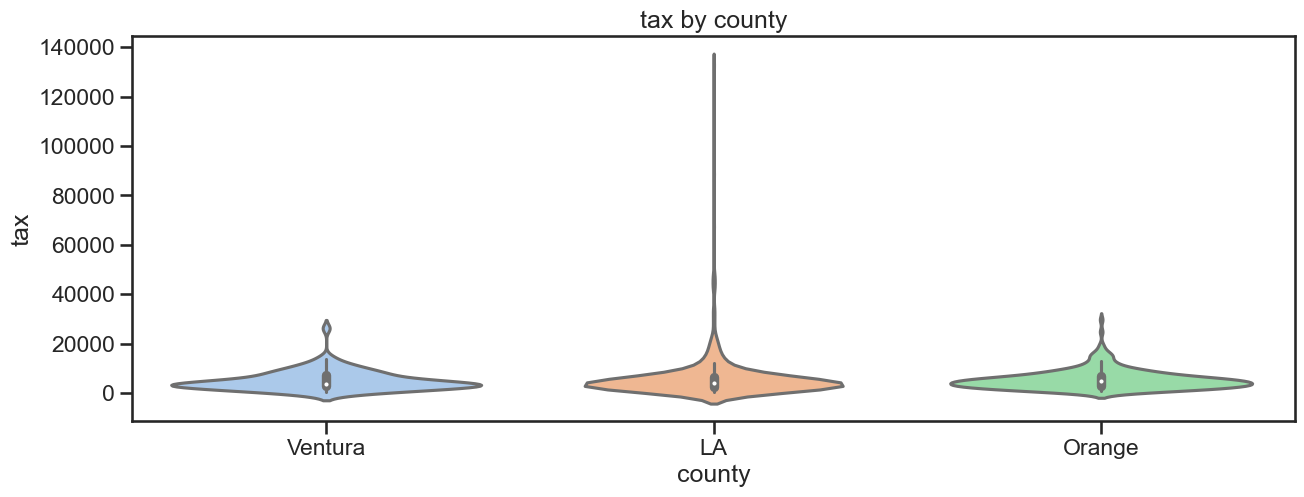

In [55]:
cont = ['tax']
cat = ['bedroom', 'bathroom', 'county']
plot_categorical_and_continuous_vars(train_1000, cat, cont)

2. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [14]:
train.columns

Index(['bedroom', 'bathroom', 'square_ft', 'property_value', 'yr_built', 'tax',
       'county'],
      dtype='object')

In [17]:
train_con_columns = train[['bedroom', 'bathroom', 'square_ft', 'property_value', 'yr_built', 'tax']]
train_con_columns

,bedroom,bathroom,square_ft,property_value,yr_built,tax
462820,5.0,4.0,3011.0,710674.0,2005,7561.14
3880,3.0,2.0,1682.0,603333.0,1961,7086.19
992263,4.0,2.0,1433.0,82804.0,1954,1134.83
311722,3.0,2.5,2001.0,355444.0,1999,4174.92
787985,4.0,2.0,2277.0,571000.0,1962,7113.02
...,...,...,...,...,...,...
1966409,3.0,2.0,1452.0,312978.0,1963,4009.01
1248263,4.0,3.0,2674.0,417545.0,1979,4248.88
28211,5.0,3.0,1903.0,300584.0,1965,3924.33
279547,4.0,4.5,3672.0,1115000.0,2001,13029.86


In [96]:
train_county_1000 = train.county.sample(1000)

In [97]:
train_1000 = train.sample(1000)

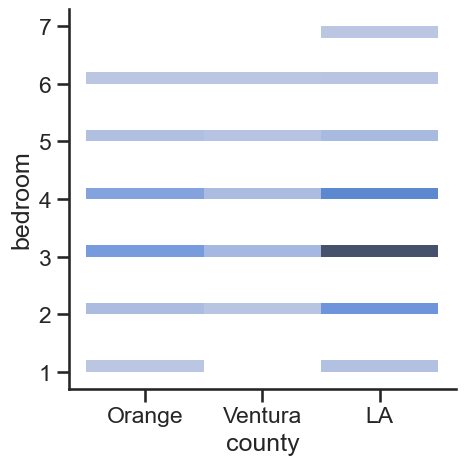

In [119]:
sns.displot(data=train_1000, y=train_1000.bedroom, x=train_1000.county)
plt.show();

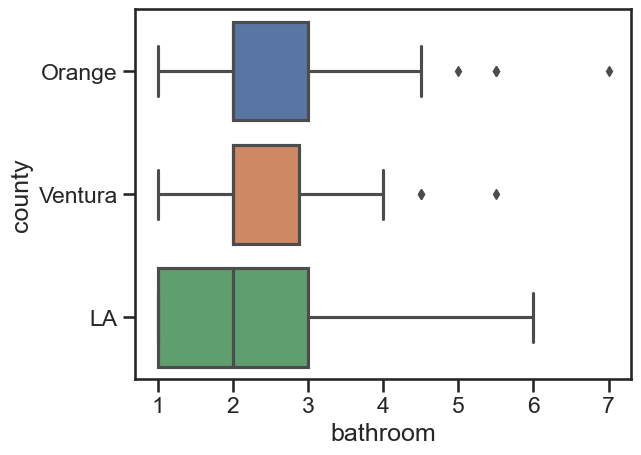

In [120]:
sns.boxplot(data=train_1000, x=train_1000.bathroom, y=train_1000.county)
plt.show();

TypeError: can't multiply sequence by non-int of type 'float'

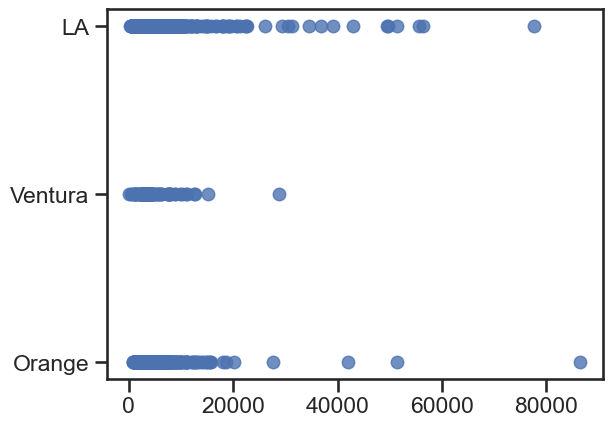

In [123]:
sns.regplot(data=train_1000, x=train_1000.tax, y=train_1000.county, scatter=True)
plt.show();

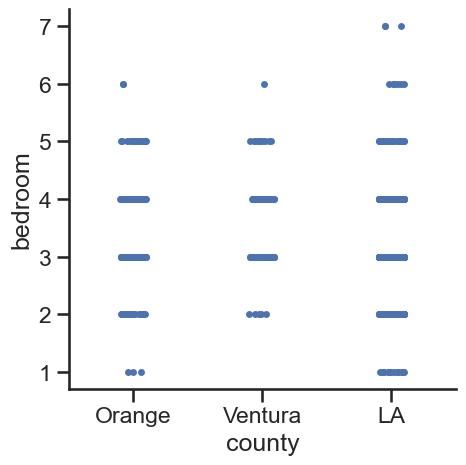

In [114]:
sns.catplot(data=train_1000, x=train_1000.county, y=train_1000.bedroom)
plt.show();

this file exists, reading from csv file


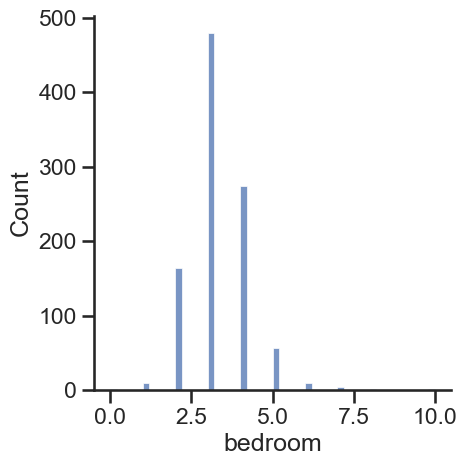

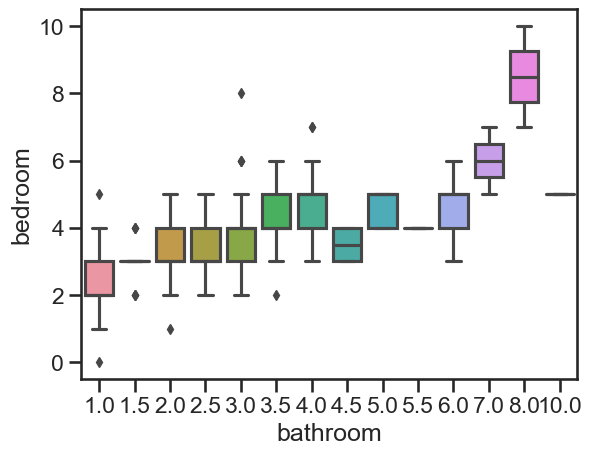

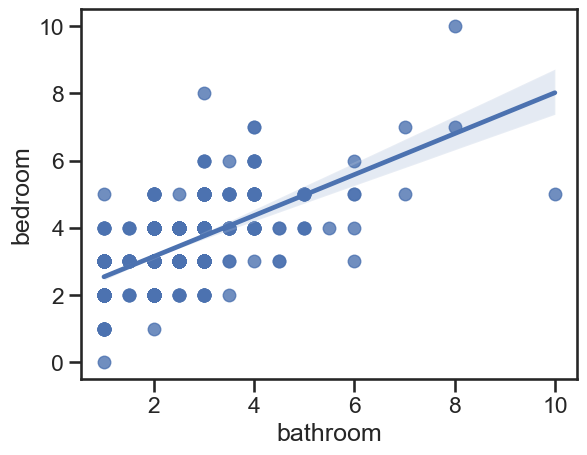

In [115]:
explore.plot_categorical_and_continuous_vars()

5. Come up with some initial hypotheses based on your goal of predicting property value.

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1284141 entries, 462820 to 778196
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   bedroom         1284141 non-null  float64
 1   bathroom        1284141 non-null  float64
 2   square_ft       1284141 non-null  float64
 3   property_value  1284141 non-null  float64
 4   yr_built        1284141 non-null  int64  
 5   tax             1284141 non-null  float64
 6   county          1284141 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.4+ MB


In [20]:
columns = ['bedroom', 'bathroom', 'square_ft', 'property_value', 'yr_built', 'tax']
corrs = train[columns].corr(method='spearman')
corrs

,bedroom,bathroom,square_ft,property_value,yr_built,tax
bedroom,1.000000,0.634233,0.655474,0.295250,0.425741,0.296697
bathroom,0.634233,1.000000,0.826175,0.481949,0.569716,0.481522
square_ft,0.655474,0.826175,1.000000,0.523634,0.511892,0.521115
property_value,0.295250,0.481949,0.523634,1.000000,0.289844,0.978536
yr_built,0.425741,0.569716,0.511892,0.289844,1.000000,0.288215
tax,0.296697,0.481522,0.521115,0.978536,0.288215,1.000000


> 6. Visualize all combinations of variables in some way.

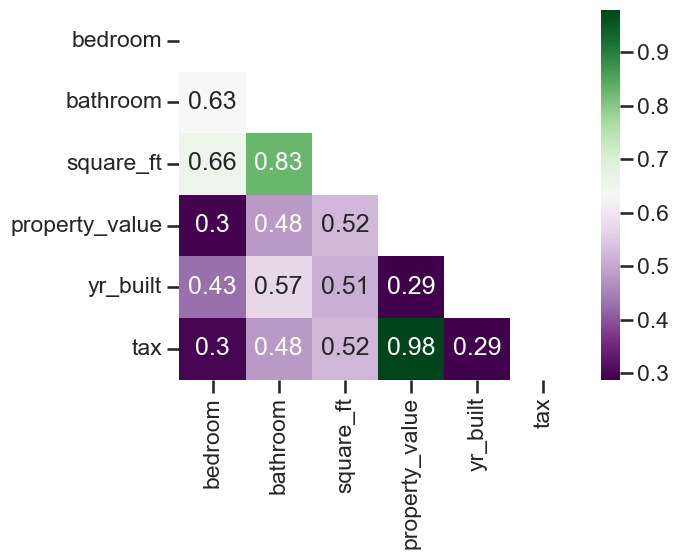

In [56]:
sns.heatmap(corrs, cmap='PRGn', annot=True, mask=np.triu(corrs))
plt.show();

#### Stat test using property value and square ft
$H_o$: There is NO correlation between property value and square_ft

$H_a$: There IS a correlation between property value and square_ft

In [43]:
α = 0.05

In [ ]:
# Stat test on square_ft and tax_value
r, p = stats.spearmanr(train.square_ft, train.tax_value)

In [ ]:
r, p

In [ ]:
if p < α:
    print('We can reject our null hypothesis and that suggest that there is a linear corrleation')
else:
    print('We fail to reject the null hypothesis')

> Conclusion:
>> The square_ft is one of many factors affect the property value depending the county's suggested price location.

>> That is why it's only 52% correlation

#### Stat test on tax and tax_value

$H_o$: There is NO correlation between property value and tax

$H_a$: There IS a correlation between property value and tax

α = 0.05

In [61]:
r, p = stats.spearmanr(train.tax, train.property_value)

In [62]:
r, p

(0.9785359758073234, 0.0)

In [63]:
if p < α:
    print('We can reject our null hypothesis and that suggest that there is a linear corrleation')
else:
    print('We fail to reject the null hypothesis')

We can reject our null hypothesis and that suggest that there is a linear corrleation


> Conclusion:
>> The tax value is generated from the actual tax of the property. Depending on the tax percentage set for the county

>> That is why the correlation is high at 98%

In [ ]:
train.head()

In [ ]:
train_tax_value = train.tax_value.sample(1000)

In [ ]:
train_tax = train.tax.sample(1000)

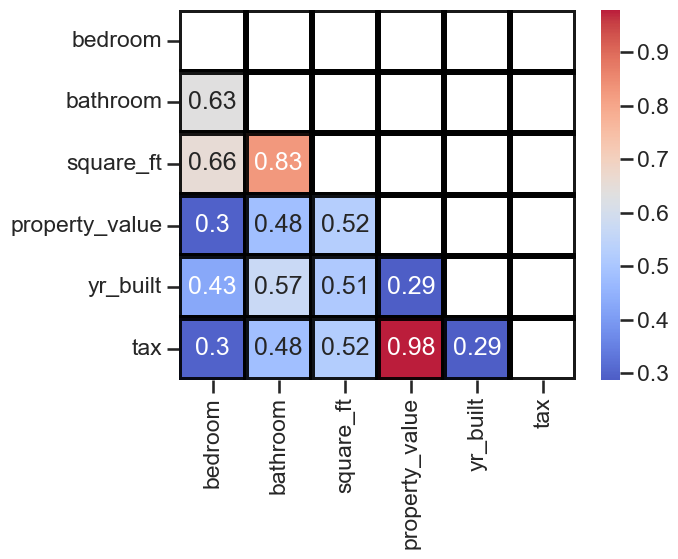

In [59]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black',
          'cmap': 'coolwarm',
          'annot': True,
          'mask': np.triu(corrs)}
# function call has no more stuff inline
sns.heatmap(corrs, **kwargs);

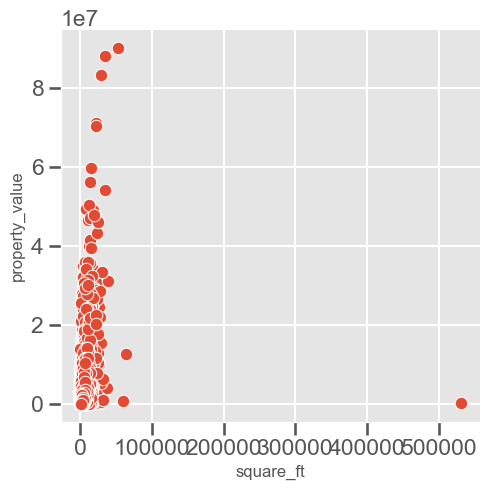

In [39]:
sns.relplot(data=train, x=train.square_ft, y=train.property_value)
plt.show();

In [91]:
def eval_Spearman(column1, column2, α=0.05):
    
    r, p = stats.spearmanr(column1, column2)
    print(f'r-value is: {r:2f}')
    print(f'p-value is: {p:2f}')
    print()
    if p < α:
        return print(f'We reject H₀, there is a linear relationship.')

    else:
        return print(f'We fail to reject H₀: that there is a linear relationship.')

In [92]:
eval_Spearman_1(train_1000.bedroom, train_1000.bathroom)

r-value is: 0.640016
p-value is: 0.000000

We reject H₀, there is a linear relationship.
